# read_raw_data

In [1]:
import json
import pandas as pd
import re

In [2]:
filename = './data/weapon_raw.json'

In [3]:
with open(filename,'r',encoding='utf-8') as f:
    data = json.load(f)

In [4]:
line = data[0]
line.keys()

dict_keys(['link', 'catalog', 'name', 'country', 'data_info', 'module', 'text', 'info'])

In [6]:
line['catalog'][-1]

'飞行器'

In [7]:
line['name'].split('> ')

[' ', '歼-20']

In [9]:
line

{'link': 'http://weapon.huanqiu.com/j_20',
 'catalog': ['环球网', '环球军事', '全球 · 兵器库', '飞行器'],
 'name': ' > 歼-20',
 'country': '中国',
 'data_info': ['名称：',
  '歼-20战斗机',
  '首飞时间：',
  '2011年1月11日',
  '研发单位：',
  '成都飞机工业集团',
  '关注度：',
  '(4.8分)',
  '武器装备',
  '据推测，歼-20的可选装备如下：',
  '（1）远程空对空导弹：霹雳-21，中程空对空导弹：霹雳-12D，近程空对空导弹：霹雳-10，近程空对空格斗导弹：霹雳-8；',
  '（2）精确制导滑翔炸弹：雷石-6；',
  '（3）机炮：一门23毫米双管航空机炮。',
  '技术数据',
  '乘员：',
  '1人',
  '机长：',
  '20.3米',
  '翼展：',
  '12.88米',
  '机高：',
  '4.45米',
  '空重：',
  '17,000千克',
  '发动机：',
  '涡扇15发动机',
  '最大起飞重量：',
  '37,000千克',
  '性能数据',
  '最大飞行速度：',
  '3,062.7千米每小时',
  '最大航程：',
  '6,000千米'],
 'module': ['\n\t\u3000\u3000歼-20(J-20)，绰号“威龙”，北约代号“火牙”（FIRE FANG）。是成都飞机工业集团为中国人民解放军研制的最新一代（欧美旧标准为第四代，新标准以及俄罗斯标准为第五代）双发重型隐形战斗机，用于接替歼10、歼11等第三代空中优势/多用途歼击机的未来重型歼击机型号，该机将担负我军未来对空、对海的主权维护任务。预计歼-20将在2017~2019年间投入使用，2020年后逐步形成战斗力。首架原型机于2011年1月11日在成都实现首飞。\n',
  '结构特点',
  '使用情况',
  '结构特点',
  '\n\t歼-20采用了单座、双发、全动双垂尾、DSI鼓包式进气道、上反鸭翼带尖拱边条的鸭式气动布局。机头、机身呈菱形，垂直尾翼向外倾斜，起落架舱门为锯齿边设计，机身以墨绿色涂装，远观近似于黑色。侧弹舱采用

In [10]:
info = {}
for i,inf in enumerate(line['info']):
    if len(inf)>6 and len(line['info'][i-1])<6:
        info[line['info'][i-1]]=inf

In [11]:
info

{'结构特点': '\n\t歼-20采用了单座、双发、全动双垂尾、DSI鼓包式进气道、上反鸭翼带尖拱边条的鸭式气动布局。机头、机身呈菱形，垂直尾翼向外倾斜，起落架舱门为锯齿边设计，机身以墨绿色涂装，远观近似于黑色。侧弹舱采用创新结构，可将导弹发射挂架预先封闭于外侧，同时配备国内最先进的新型格斗导弹。\n',
 '使用情况': '\n\t用于接替歼10、歼11等第三代空中优势/多用途歼击机的未来重型歼击机型号，该机将担负我军未来对空、对海的主权维护任务。2011号歼20也已飞离成都前往其他地区进行更多试验。\n'}

In [12]:
line['info']

['结构特点',
 '使用情况',
 '结构特点',
 '\n\t歼-20采用了单座、双发、全动双垂尾、DSI鼓包式进气道、上反鸭翼带尖拱边条的鸭式气动布局。机头、机身呈菱形，垂直尾翼向外倾斜，起落架舱门为锯齿边设计，机身以墨绿色涂装，远观近似于黑色。侧弹舱采用创新结构，可将导弹发射挂架预先封闭于外侧，同时配备国内最先进的新型格斗导弹。\n',
 '使用情况',
 '\n\t用于接替歼10、歼11等第三代空中优势/多用途歼击机的未来重型歼击机型号，该机将担负我军未来对空、对海的主权维护任务。2011号歼20也已飞离成都前往其他地区进行更多试验。\n']

In [13]:
def line_data_info(line):
    info_dict = {}
    info = line['data_info']
    for i,x in enumerate(info):
        if x=='武器装备':
            lis = []
            j = i
            while True:
                j+=1
                if j<len(info):
                    break                
                if info[j].find('如下：')>-1:
                    continue
                elif re.match( r'（.*）', info[j]):
                    lis.append(info[j])
                else:
                    info_dict['武器装备']=lis
                    break        
        elif x[-1] == '：' and x.find('如下：')==-1:
            info_dict[x[:-1]] = info[i+1]
    return info_dict

In [14]:
def line_info(line):
    features=['结构特点', '型号演变', '使用情况','主要用户','研制历程']
    info = line['info']
    info_dict = {}
    feature = None
    for i,it in enumerate(info):
        if it in features:
            if feature:
                info_dict[feature]=feature_data
            feature = it
            feature_data = []
        else:
            if feature:
                feature_data.append(it)
    if feature:
        info_dict[feature]=feature_data
    return info_dict

In [15]:
line_info(data[0])

{'结构特点': ['\n\t歼-20采用了单座、双发、全动双垂尾、DSI鼓包式进气道、上反鸭翼带尖拱边条的鸭式气动布局。机头、机身呈菱形，垂直尾翼向外倾斜，起落架舱门为锯齿边设计，机身以墨绿色涂装，远观近似于黑色。侧弹舱采用创新结构，可将导弹发射挂架预先封闭于外侧，同时配备国内最先进的新型格斗导弹。\n'],
 '使用情况': ['\n\t用于接替歼10、歼11等第三代空中优势/多用途歼击机的未来重型歼击机型号，该机将担负我军未来对空、对海的主权维护任务。2011号歼20也已飞离成都前往其他地区进行更多试验。\n']}

In [16]:
def line_dict(line):
    line_dict={}
    line_dict['link'] = line['link']
    line_dict['catalog'] = line['catalog'][-1]
    line_dict['name'] = line['name'].replace(' > ','')
    line_dict['country'] = line['country']
    line_dict['data_info'] = line_data_info(line)
    line_dict['text'] = line['text']
    line_dict['info'] = line_info(line)
    return line_dict

In [17]:
df = pd.DataFrame()
for i,line in enumerate(data):
#     print(i)
    line_dic = line_dict(line)
    df=df.append(line_dic,ignore_index=True)

    # 大致查看一下info中有哪些特征
info_set = set()
for i,line in enumerate(data):
    for j,it in enumerate(line['info']):
        if len(it)==4:
            info_set.add(it)
        # 查看了几个词的上下文内容
        # if it== '第一批次':
            # print(line['info'])
        if j>5:
            break
info_set

In [18]:
df.head()

,catalog,country,data_info,info,link,name,text
0,飞行器,中国,"{'名称': '歼-20战斗机', '首飞时间': '2011年1月11日', '研发单位'...",{'结构特点': [' 歼-20采用了单座、双发、全动双垂尾、DSI鼓包式进气道、上反鸭翼...,http://weapon.huanqiu.com/j_20,歼-20,[\n\t 歼-20(J-20)，绰号“威龙”，北约代号“火牙”（FIRE FANG）。是...
1,飞行器,美国,"{'名称': 'B-58“盗贼”', '首飞时间': '1956年11月11日', '服役时...",{'结构特点': [' 三角翼；翼下吊挂四台涡轮喷气式发动机；无水平尾翼；细长的尖头机身；...,http://weapon.huanqiu.com/b_58,B-58“盗贼”,[\n\t三角翼；翼下吊挂四台涡轮喷气式发动机；无水平尾翼；细长的尖头机身；机身下的大有效钱...
2,飞行器,美国,"{'名称': 'O3U/SU“海盗”', '首飞时间': '1930年', '生产单位': ...",{'结构特点': [' 双翼，带有上翼翻角、下翼翻角和后掠角；星形发动机（带整流罩或不带整...,http://weapon.huanqiu.com/o3u_su,O3U/SU“海盗”,[\n\t 沃特公司的新“海盗”是基于O2U观察机／通用机的成功发展出来的，它和O2U的机...
3,飞行器,美国,"{'名称': 'BC/AT-6/SNJ“德克萨斯人”', '首飞时间': '1936年4月（...",{'结构特点': [' 单翼；收放式起落架；被整流罩严密包裹的星形发动机；固定尾轮。 ']...,http://weapon.huanqiu.com/bc_at_6_snj,BC/AT-6/SNJ“德克萨斯人”,"[\n\t单翼；收放式起落架；被整流罩严密包裹的星形发动机；固定尾轮。\n, \n\t数十年..."
4,飞行器,美国,"{'名称': '18型“北极星”', '首飞时间': '1939年9月21日', '研发单位...",{'结构特点': [' 单翼；收放式起落架；被整流罩严密包裹的两台联装的星形发动机；双尾翼...,http://weapon.huanqiu.com/type_18,18型“北极星”,"[\n\t单翼；收放式起落架；被整流罩严密包裹的两台联装的星形发动机；双尾翼。\n, \n\..."


In [19]:
count= df['catalog'].value_counts()

In [20]:
count

飞行器       1330
舰船舰艇      1192
枪械与单兵      966
坦克装甲车辆     547
火炮         540
爆炸物        459
导弹武器       445
太空装备       366
Name: catalog, dtype: int64

In [21]:
fil = re.compile(u'[^0-9a-zA-Z\u4e00-\u9fa5.， ,\-。%《*》/•、&＆(—)（+）：？!！“”·]+', re.UNICODE)

In [24]:
labels = []
texts = []
for d in data:
    labels.append(d['catalog'][-1])
    text = ''.join(d['text'])
    text = fil.sub('', text)
    texts.append(text)

In [25]:
classify_dict = {}
classify_dict['labels']=labels
classify_dict['texts']=texts

In [26]:
classify_df = pd.DataFrame(classify_dict)

In [27]:
classify_df.head()

,labels,texts
0,飞行器,歼-20(J-20)，绰号“威龙”，北约代号“火牙”（FIRE FANG）。是成都飞机工业集...
1,飞行器,三角翼翼下吊挂四台涡轮喷气式发动机无水平尾翼细长的尖头机身机身下的大有效钱荷荚舱。康维尔公司...
2,飞行器,沃特公司的新“海盗”是基于O2U观察机通用机的成功发展出来的，它和O2U的机型十分相似，变种...
3,飞行器,单翼收放式起落架被整流罩严密包裹的星形发动机固定尾轮。数十年来仅被当作“驾驶员制造者”的AT...
4,飞行器,单翼收放式起落架被整流罩严密包裹的两台联装的星形发动机双尾翼。1940年，“北极星”首次吸引...


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-igs2aa7_ because the default path (/home/lengyue/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


([<matplotlib.axis.XTick at 0x7fb946ffbd00>,
 [Text(0, 0, '飞行器'),
  Text(1, 0, '舰船舰艇'),
  Text(2, 0, '枪械与单兵'),
  Text(3, 0, '坦克装甲车辆'),
  Text(4, 0, '火炮'),
  Text(5, 0, '爆炸物'),
  Text(6, 0, '导弹武器'),
  Text(7, 0, '太空装备')])

findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.


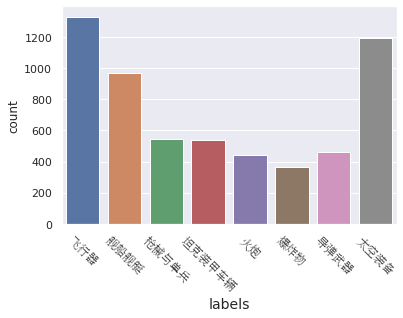

In [28]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['simhei']
mpl.rcParams['font.serif'] = ['simhei']

mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
myfont =  FontProperties(fname='/usr/share/fonts/truetype/arphic/uming.ttc',size=20)
sns.set_style("darkgrid",{"font.sans-serif":['Arial','simhei','Droid Sans Fallback']})
sns.set(font='simhei')  # 解决Seaborn中文显示问题

sns.countplot(x="labels", data=classify_df)
# sns.countplot(x="deck", data=titanic, palette="Reds_d", ax=axes[0])
plt.xlabel('labels',size = 14)
# plt.ylabel('Predicted label',size = 14)
plt.xticks(np.arange(8),count.index,fontproperties=myfont,size = 12,rotation=-45)

In [29]:
from collections import Counter

In [30]:
texts_len=[]
for t in texts:
    texts_len.append(len(t))

/home/lengyue/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

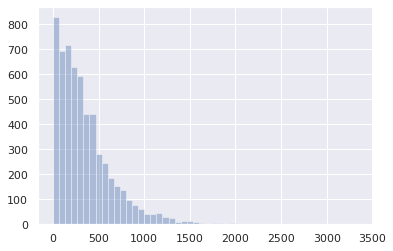

In [31]:
sns.distplot(texts_len,kde=False)

# 移除特殊字符

In [32]:
# import re
# #去除文本中的表情字符（只保留中英文和数字）
# def clear_character(sentence):
#     pattern1= '\[.*?\]'     
#     pattern2 = re.compile('[^\u4e00-\u9fa5^a-z^A-Z^0-9]')   
#     line1=re.sub(pattern1,'',sentence)
#     line2=re.sub(pattern2,'',line1)   
#     new_sentence=''.join(line2.split()) #去除空白
#     return new_sentence
# train_text=list(map(lambda s: clear_character(s), train_contents))
# test_text=list(map(lambda s: clear_character(s), test_contents))


# 分词

In [33]:
import jieba
seg_texts=list(map(lambda s: jieba.lcut(s), texts))
# test_seg_text=list(map(lambda s: jieba.lcut(s), texts))


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.711 seconds.
Prefix dict has been built successfully.


In [34]:
texts[0]

'歼-20(J-20)，绰号“威龙”，北约代号“火牙”（FIRE FANG）。是成都飞机工业集团为中国人民解放军研制的最新一代（欧美旧标准为第四代，新标准以及俄罗斯标准为第五代）双发重型隐形战斗机，用于接替歼10、歼11等第三代空中优势/多用途歼击机的未来重型歼击机型号，该机将担负我军未来对空、对海的主权维护任务。预计歼-20将在20172019年间投入使用，2020年后逐步形成战斗力。首架原型机于2011年1月11日在成都实现首飞。歼-20采用了单座、双发、全动双垂尾、DSI鼓包式进气道、上反鸭翼带尖拱边条的鸭式气动布局。机头、机身呈菱形，垂直尾翼向外倾斜，起落架舱门为锯齿边设计，机身以墨绿色涂装，远观近似于黑色。侧弹舱采用创新结构，可将导弹发射挂架预先封闭于外侧，同时配备国内最先进的新型格斗导弹。用于接替歼10、歼11等第三代空中优势/多用途歼击机的未来重型歼击机型号，该机将担负我军未来对空、对海的主权维护任务。2011号歼20也已飞离成都前往其他地区进行更多试验。'

In [36]:
print(' '.join(seg_texts[0]))

歼 - 20 ( J - 20 ) ， 绰号 “ 威龙 ” ， 北约 代号 “ 火牙 ” （ FIRE   FANG ） 。 是 成都 飞机 工业 集团 为 中国人民解放军 研制 的 最新 一代 （ 欧美 旧 标准 为 第四代 ， 新 标准 以及 俄罗斯 标准 为 第五代 ） 双发 重型 隐形 战斗机 ， 用于 接替 歼 10 、 歼 11 等 第三代 空中 优势 / 多用途 歼击机 的 未来 重型 歼击机 型号 ， 该机 将 担负 我军 未来 对空 、 对海 的 主权 维护 任务 。 预计 歼 - 20 将 在 20172019 年间 投入使用 ， 2020 年 后 逐步形成 战斗力 。 首架 原型机 于 2011 年 1 月 11 日 在 成都 实现 首飞 。 歼 - 20 采用 了 单座 、 双发 、 全动 双垂尾 、 DSI 鼓包 式 进气道 、 上 反鸭翼 带 尖 拱 边条 的 鸭式 气动 布局 。 机头 、 机身 呈 菱形 ， 垂直 尾翼 向外 倾斜 ， 起落架 舱门 为 锯齿 边 设计 ， 机身 以 墨绿色 涂装 ， 远观 近似于 黑色 。 侧弹 舱 采用 创新 结构 ， 可 将 导弹 发射 挂架 预先 封闭 于 外侧 ， 同时 配备 国内 最 先进 的 新型 格斗 导弹 。 用于 接替 歼 10 、 歼 11 等 第三代 空中 优势 / 多用途 歼击机 的 未来 重型 歼击机 型号 ， 该机 将 担负 我军 未来 对空 、 对海 的 主权 维护 任务 。 2011 号 歼 20 也 已 飞离 成都 前往 其他 地区 进行 更 多 试验 。


## 词典

In [64]:
# 歼10等只在一个文本中出现，统计意义不大
dict_name = './data/weapon_dict.txt'
jieba.load_userdict(dict_name) 

In [57]:
texts[0]

'歼-20(J-20)，绰号“威龙”，北约代号“火牙”（FIRE FANG）。是成都飞机工业集团为中国人民解放军研制的最新一代（欧美旧标准为第四代，新标准以及俄罗斯标准为第五代）双发重型隐形战斗机，用于接替歼10、歼11等第三代空中优势/多用途歼击机的未来重型歼击机型号，该机将担负我军未来对空、对海的主权维护任务。预计歼-20将在20172019年间投入使用，2020年后逐步形成战斗力。首架原型机于2011年1月11日在成都实现首飞。歼-20采用了单座、双发、全动双垂尾、DSI鼓包式进气道、上反鸭翼带尖拱边条的鸭式气动布局。机头、机身呈菱形，垂直尾翼向外倾斜，起落架舱门为锯齿边设计，机身以墨绿色涂装，远观近似于黑色。侧弹舱采用创新结构，可将导弹发射挂架预先封闭于外侧，同时配备国内最先进的新型格斗导弹。用于接替歼10、歼11等第三代空中优势/多用途歼击机的未来重型歼击机型号，该机将担负我军未来对空、对海的主权维护任务。2011号歼20也已飞离成都前往其他地区进行更多试验。'

In [58]:
print(jieba.lcut(texts[0]))

['歼-20', '(', 'J-20', ')', '，', '绰号', '“', '威龙', '”', '，', '北约', '代号', '“', '火牙', '”', '（', 'FIRE', ' ', 'FANG', '）', '。', '是', '成都飞机工业集团', '为', '中国人民解放军', '研制', '的', '最新', '一代', '（', '欧美', '旧', '标准', '为', '第四代', '，', '新', '标准', '以及', '俄罗斯', '标准', '为', '第五代', '）', '双发', '重型', '隐形', '战斗机', '，', '用于', '接替', '歼10', '、', '歼11', '等', '第三代', '空中', '优势', '/', '多用途', '歼击机', '的', '未来', '重型', '歼击机', '型号', '，', '该机', '将', '担负', '我军', '未来', '对空', '、', '对海', '的', '主权', '维护', '任务', '。', '预计', '歼-20', '将', '在', '20172019', '年间', '投入使用', '，', '2020', '年', '后', '逐步形成', '战斗力', '。', '首架', '原型机', '于', '2011', '年', '1', '月', '11', '日', '在', '成都', '实现', '首飞', '。', '歼-20', '采用', '了', '单座', '、', '双发', '、', '全动', '双垂尾', '、', 'DSI', '鼓包式', '进气道', '、', '上反鸭翼', '带', '尖拱边条', '的', '鸭式', '气动布局', '。', '机头', '、', '机身', '呈', '菱形', '，', '垂直', '尾翼', '向外', '倾斜', '，', '起落架', '舱门', '为', '锯齿', '边', '设计', '，', '机身', '以', '墨绿色', '涂装', '，', '远观', '近似于', '黑色', '。', '侧弹', '舱', '采用', '创新', '结构', '，', '可', '将', '导弹', '发射', '挂架', '预

# 去停用词

In [41]:
stop_words_path = "../stopwords/百度停用词列表.txt"
def get_stop_words():
    file = open(stop_words_path, 'rb').read().decode('gbk').split('\r\n')
    return set(file)
stopwords = get_stop_words()

# 去掉文本中的停用词
def drop_stopwords(line, stopwords):
    line_clean = []
    for word in line:
        if word in stopwords:
            continue
        line_clean.append(word)
    return line_clean

In [43]:
clean_text=list(map(lambda s: drop_stopwords(s,stopwords), seg_texts))

In [258]:
corpus=list(map(lambda s: ' '.join(s), seg_texts))
# corpus=list(map(lambda s: ' '.join(s), clean_text))

# Feature word extraction

## jieba_analysis

### extract_tags

结巴中内嵌了词典的idf值，然后根据该值计算单条文本中词语的tfidf值，判断单词的重要性。

In [105]:
import jieba.analyse

In [102]:
topK = 20

In [109]:
i = 0
tags = jieba.analyse.extract_tags(corpus[i], topK=topK)
tags

['20', '歼击机', '11', '重型', '10', '对海', '2011', '双发', '成都', '未来']

### textrank

In [161]:
i=1
tags = jieba.analyse.textrank(corpus[i], topK=20, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v')) 
print(tags)

['轰炸机', '机身', '联队', '关闭', '宣布', '进入', '军械', '世界', '攻克', '公司', '服役', '蜂窝', '不锈钢', '中队', '巴黎', '涡轮', '战略空军', '司令部', '尖头', '装备']


In [162]:
tags = jieba.analyse.textrank(corpus[i], topK=20, withWeight=False) 
print(tags)

['轰炸机', '机身', '联队', '关闭', '宣布', '进入', '军械', '世界', '攻克', '公司', '服役', '蜂窝', '不锈钢', '中队', '巴黎', '涡轮', '战略空军', '司令部', '尖头', '装备']


## sklearn

## 分类tfidf

In [230]:
count= df['catalog'].value_counts()
categories = count.index
cat_to_id = dict(zip(categories, range(len(categories))))
id_to_cat = dict(zip(range(len(categories)),categories))

In [233]:
corpus_lab = ['']*8
for i in range(len(corpus)):
    corpus_lab[label_id[i]] += corpus[i]

In [234]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [235]:
# 词袋模型
vectorizer=CountVectorizer()
count = vectorizer.fit_transform(corpus_lab)
count_matrix = count.toarray() #才会变成矩阵的形式
print(count_matrix) #词袋模型特征：行数是文章数量，列数是字典size，每个元素代表该文章中该词出现的次数

[[ 0 30  0 ...  2  1  1]
 [ 1 28  0 ... 28  0  0]
 [ 3 19  0 ...  0  0  0]
 ...
 [ 0  9  1 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 7  4  0 ...  0  0  0]]


In [236]:
# TF-IDF特征
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(count_matrix)
tfidf_matrix = tfidf.toarray() # TF-IDF特征：行数是文章数量，列数是字典size，每个元素代表改文章中该词的TF-IDF权重
print(tfidf_matrix)

[[0.         0.00517214 0.         ... 0.00072362 0.00043171 0.00043171]
 [0.00028614 0.00442425 0.         ... 0.00928479 0.         0.        ]
 [0.00092851 0.00324726 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00531237 0.00147806 ... 0.         0.         0.        ]
 [0.         0.0021826  0.         ... 0.         0.         0.        ]
 [0.00476268 0.00150284 0.         ... 0.         0.         0.        ]]


In [238]:
for lab in id_to_cat.keys():
    tfidf_topk = np.argsort(-tfidf_matrix[lab])[:200]
    print('label: {}, label_id: {}'.format(id_to_cat[lab],lab))
    for w in tfidf_topk:
        print(vectorizer.get_feature_names()[w],end=', ')
    print()

label: 飞行器, label_id: 0
飞机, 发动机, 机身, 起落架, 战斗机, 公司, 生产, 设计, 美国, 原型机, 轰炸机, 机型, 海军, 采用, 首飞, 掠式, 单翼, 桨叶, 教练机, 直升机, 机翼, 安装, 尾翼, 空军, 飞行, 研制, 收放, 试飞, 水平尾翼, 涡轮, 服役, 两台, 该机, 螺旋桨, 20, 航空, 第一架, 12, 10, 制造, 一架, 三点式, 驾驶舱, 垂直, 座舱, 米格, 美国空军, 性能, 苏联, 雅克, 系统, 年代, 尾桨, 一种, 空中, 用于, 机头, 无人机, 交付, 星形, 计划, 日本, 11, 下置, 侦察机, 击落, 雷达, 战机, 飞行员, 装备, 双翼, 中国, 一个, 风扇, 波音, 战争, 双座, 攻击机, 双发, 作战, 中队, 发展, 背鳍, 整流罩, 运输机, 命名, 攻击, 单台, 涡轮轴发, 直线, 部队, 执行, 陆军, 成功, 单座, 型飞机, 美国陆军, 喷气式, 形下, 旋翼, 格鲁曼, 罗尔斯, 15, 包括, 进气口, 首次, 法国, 世纪, 罗伊斯, 轰炸, 引擎, 动机, 客机, 生产型, 浮筒, 型号, 改进, 取代, 结构, 英国, 起飞, 翼尖, 侦察, 掠翼, 购买, 机体, 技术, 航空母舰, 24, 马力, 单翼机, 德国, 布局, 订购, 30, 首架, 29, 50, 开发, 起降, 17, 能力, 配备, 寇蒂斯, 机枪, 两架, 速度, 提供, 舰载, 基础, 两侧, 俯冲, 16, 位于, 目标, 系列, 包裹, 国家, 武器, 美军, 严密, 活塞, 大型, 油箱, 莱卡, 先进, 训练, 机种, 订单, 运输, 轻型, 全金属, 炸弹, 25, 驾驶, 空战, 固定, 正式, 直翼, 道格拉斯, 研发, 设计局, 21, 俄罗斯, 试验, 设备, 1945, dc, 期间, 舷窗, 测试, 导弹, 最终, 18, 地面, 22, 14, 蒙皮, 一款, 最初, 
label: 舰船舰艇, label_id: 1
海军, 上层建筑, 建造, 位于, 烟囱, 潜艇, 航空母舰, 舰桥, 护卫舰, 驱逐舰, 设计, 甲板, 下水, 舰队, 该级, 服役, 造船厂, 美国, 主桅, 导弹, 战列舰, 舰体, 日本, 舰首, 舰炮,

 采用互信息来对特征进行选择，全部特征可以是Count矩阵也可以是TF-IDF矩阵，被选择的特征指的是字典里的词，只有当该词大于一定的互信息时才会保留下来。互信息衡量的是“该词在各篇文章中TF-IDF值组成的向量”与“各篇文章的类别”的相关程度，互信息越大越好。互信息筛选用的是sklearn.metrics.mutual_info_score(labels, x)，也可以用特征选择里的sklearn.feature_selection.mutual_info_classif(X, y）。

In [259]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [260]:
# 词袋模型
vectorizer=CountVectorizer()
count = vectorizer.fit_transform(corpus)
count_matrix = count.toarray() #才会变成矩阵的形式
print(count_matrix) #词袋模型特征：行数是文章数量，列数是字典size，每个元素代表该文章中该词出现的次数

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [261]:
# vocab = vectorizer.get_feature_names()#字典
# for i in range(len(count_matrix)):#打印每篇文章中字典各词出现的次数，第一个for遍历所有文章，第二个for遍历字典各词
#     print(u"-------这里输出第",i,u"篇文章中字典各词的词频------")
#     for j in range(len(vocab)):
#         print(vocab[j], count_matrix[i][j])
 

In [262]:
# TF-IDF特征
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(count_matrix)
tfidf_matrix = tfidf.toarray() # TF-IDF特征：行数是文章数量，列数是字典size，每个元素代表改文章中该词的TF-IDF权重
print(tfidf_matrix)
# for i in range(len(tfidf_matrix)):
#     print(u"-------这里输出第",i,u"篇文章中字典各词的TF-IDF权重------")
#     for j in range(len(vocab)):
#         print(vocab[j], tfidf_matrix[i][j])
 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### tfidf直接提取

In [52]:
type(tfidf_matrix)

numpy.ndarray

In [53]:
tfidf_matrix[0]

array([0., 0., 0., ..., 0., 0., 0.])

#### 全排序

In [54]:
tfidf_matrix[0][np.argsort(-tfidf_matrix[0])[:10]]

array([0.33638896, 0.25465119, 0.24468057, 0.19654366, 0.17025321,
       0.15816958, 0.15287356, 0.13854759, 0.13722982, 0.13706954])

In [55]:
tfidf_topk = np.argsort(-tfidf_matrix[0])[:50]

In [56]:
for w in tfidf_topk:
    print(vectorizer.get_feature_names()[w],end=', ')

歼击机, 成都, 未来, 主权, 20, 重型, 接替, 担负, 我军, 标准, 对空, 第三代, 优势, 维护, 双发, 对海, 2011, 11, 多用途, 侧弹, 反鸭翼, 威龙, 20172019, 远观, fang, 火牙, 该机, 逐步形成, dsi, 鼓包, fire, 墨绿色, 空中, 近似于, 菱形, 锯齿, 飞离, 欧美, 全动, 边条, 第五代, 双垂尾, 创新, 预先, 2020, 机身, 型号, 一代, 向外, 涂装, 

In [57]:
corpus[0]

'歼 - 20 ( J - 20 ) ， 绰号 威龙 ， 北约 代号 火牙 （ FIRE FANG ） 。 成都 飞机 工业 集团 中国人民解放军 研制 最新 一代 （ 欧美 旧 标准 第四代 ， 新 标准 俄罗斯 标准 第五代 ） 双发 重型 隐形 战斗机 ， 用于 接替 歼 10 、 歼 11 第三代 空中 优势 / 多用途 歼击机 未来 重型 歼击机 型号 ， 该机 担负 我军 未来 对空 、 对海 主权 维护 。 预计 歼 - 20 20172019 年间 投入使用 ， 2020 年 后 逐步形成 战斗力 。 首架 原型机 2011 年 1 月 11 日 成都 首飞 。 歼 - 20 采用 单座 、 双发 、 全动 双垂尾 、 DSI 鼓包 式 进气道 、 上 反鸭翼 带 尖 拱 边条 鸭式 气动 布局 。 机头 、 机身 呈 菱形 ， 垂直 尾翼 向外 倾斜 ， 起落架 舱门 锯齿 设计 ， 机身 墨绿色 涂装 ， 远观 近似于 黑色 。 侧弹 舱 采用 创新 结构 ， 导弹 发射 挂架 预先 封闭 外侧 ， 配备 国内 最 先进 新型 格斗 导弹 。 用于 接替 歼 10 、 歼 11 第三代 空中 优势 / 多用途 歼击机 未来 重型 歼击机 型号 ， 该机 担负 我军 未来 对空 、 对海 主权 维护 。 2011 号 歼 20 已 飞离 成都 前往 地区 更 试验 。'

#### 部分排序

In [58]:
tfidf_topk

array([32773, 27272, 31276, 13854,  1210, 44249, 28772, 28148, 27280,
       32031, 24228, 37874, 15112, 38948, 19708, 24221,  1248,   314,
       22810, 15701, 19898, 23630,  1256, 43562,  6006, 34752, 41918,
       43837,  5603, 47141,  6084, 22433, 37526, 43342, 40724, 44763,
       46364, 32600, 16405, 43136, 37961, 19714, 17879, 46180,  1261,
       31520, 22101, 12021, 20945, 34172])

In [59]:
topk_ind = np.argpartition(tfidf_matrix[0], -50)[-50:]

In [60]:
topk_value = tfidf_matrix[0][topk_ind]

In [61]:
zipped = zip(topk_ind,-topk_value)
sort_zipped = sorted(zipped,key=lambda x:(x[1],x[0]))
result = zip(*sort_zipped)
topk_ind_sorted, topk_value_sorted = [list(x) for x in result]

In [62]:
print(topk_ind_sorted)

[32773, 27272, 31276, 13854, 1210, 44249, 28772, 28148, 27280, 32031, 24228, 37874, 15112, 19708, 38948, 24221, 1248, 314, 22810, 1256, 6006, 15701, 19898, 23630, 34752, 43562, 41918, 5603, 43837, 47141, 6084, 22433, 37526, 40724, 43342, 44763, 32600, 46364, 16405, 43136, 37961, 19714, 17879, 1261, 46180, 31520, 22101, 12021, 20945, 34172]


### 基于tfidf的互信息

In [65]:
# 用互信息进行特征选择
X_MI = {}  # 用于存储X_matrix特征与label之间的互信息值
from sklearn import metrics as mr
import numpy as np
# X_labels = np.array([1,1,2,3]) # 假设四篇文章分别对应这三种类型
tfidf_matrix_T = tfidf_matrix.T # 让每一行变成是字典里的某一个词在各篇文章中的tf-idf值，通过计算每行(4个元素）与文章类型（4个元素）的互信息，来决定要不要该词（也即特征）
for i in range(tfidf_matrix_T.shape[0]):
    X_MI[i] = mr.mutual_info_score(label_id, tfidf_matrix_T[i])

In [66]:
# # 筛选特征，根据互信息的大小进行从大到小排序，留下互信息前10的词（特征）
X_MI_filtered = [word for word in X_MI if X_MI[word] >= sorted(X_MI.values(),reverse=True)[10]]
# print(u'选择的特征对应列序号：', X_MI_filtered)

In [67]:
tfidf_matrix_filtered_by_mutualinfo_T = [tfidf_matrix_T[word] for word in X_MI_filtered]
tfidf_matrix_filtered_by_mutualinfo = np.array(tfidf_matrix_filtered_by_mutualinfo_T).T
print(u"经过互信息筛选过的词组成的TF-IDF矩阵:\n", tfidf_matrix_filtered_by_mutualinfo)

经过互信息筛选过的词组成的TF-IDF矩阵:
 [[0.         0.         0.03267674 ... 0.         0.02616821 0.05017636]
 [0.05315845 0.01830178 0.         ... 0.05013075 0.01562143 0.01497669]
 [0.04745978 0.04901939 0.         ... 0.         0.         0.04011348]
 ...
 [0.         0.05462446 0.         ... 0.         0.         0.        ]
 [0.05726552 0.01971579 0.         ... 0.0180013  0.         0.        ]
 [0.0703474  0.03632957 0.         ... 0.03317034 0.03100899 0.02972917]]


In [68]:
xmi_sorted = sorted(X_MI.values(),reverse=True)

In [69]:
X_MI_filtered = [word for word in X_MI if X_MI[word] >= xmi_sorted[100]]

In [70]:
xmi_filtered = [X_MI[word] for word in X_MI_filtered]

In [71]:
zipped = zip(X_MI_filtered,xmi_filtered)
sort_zipped = sorted(zipped,key=lambda x:(x[1],x[0]))
result = zip(*sort_zipped)
X_MI_filtered_sorted, xmi_filtered_sorted = [list(x) for x in result]

In [72]:
for w in X_MI_filtered_sorted:
    print(vectorizer.get_feature_names()[w],end=', ')

自动, 战斗机, 60, 水平, 防空, 战争, 称为, 开发, 坦克, 顶部, 地面, 射程, 德国, 提高, 80, 起落架, 日本, 卫星, 火炮, 机枪, 大型, 成功, 垂直, 英国, 15, 位置, 外形, 控制, 正式, 首次, 机身, 设备, 新型, 陆军, 火箭, 尾翼, 两侧, 后部, 工作, 车体, 试验, 取代, 命名, 两个, 炮塔, 国家, 技术, 30, 型号, 11, 系列, 世纪, 口径, 射击, 苏联, 发展, 建造, 基础, 中国, 提供, 雷达, 性能, 计划, 飞行, 攻击, 装甲, 部队, 制造, 改进, 目标, 包括, 装置, 能力, 作战, 结构, 装有, 武器, 10, 20, 12, 一个, 飞机, 位于, 一种, 导弹, 年代, 服役, 用于, 海军, 安装, 系统, 美国, 毫米, 发射, 发动机, 生产, 公司, 研制, 装备, 设计, 采用, 

### chi2

In [263]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# X_new = SelectKBest(chi2, k=50).fit_transform(tfidf_matrix, label_id)

In [264]:
model = SelectKBest(chi2, k=50)#选择k个最佳特征
X_new = model.fit_transform(tfidf_matrix, label_id)
#feature_data是特征数据，label_data是标签数据，该函数可以选择出k个特征 

scores = model.scores_
# print('model scores:', scores)  # 得分越高，特征越重要

p_values = model.pvalues_
# print('model p-values', p_values)  # p-values 越小，置信度越高，特征越重要

# 按重要性排序，选出最重要的 k 个
indices = np.argsort(scores)[::-1]
# k_best_features = list(tfidf_matrix.columns.values[indices[0:2]])



In [265]:
chi_max = model.score_func(tfidf_matrix, label_id)

In [271]:
chi_max[0]

array([3.9281172 , 0.69656088, 0.71029206, ..., 6.25093457, 0.43957184,
       0.31130656])

In [272]:
chi_max[1]

array([0.78801872, 0.99836202, 0.9982554 , ..., 0.51077373, 0.99963905,
       0.99988663])

In [256]:
help(model.score_func)

Help on function chi2 in module sklearn.feature_selection._univariate_selection:

chi2(X, y)
    Compute chi-squared stats between each non-negative feature and class.
    
    This score can be used to select the n_features features with the
    highest values for the test chi-squared statistic from X, which must
    contain only non-negative features such as booleans or frequencies
    (e.g., term counts in document classification), relative to the classes.
    
    Recall that the chi-square test measures dependence between stochastic
    variables, so using this function "weeds out" the features that are the
    most likely to be independent of class and therefore irrelevant for
    classification.
    
    Read more in the :ref:`User Guide <univariate_feature_selection>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Sample vectors.
    
    y : array-like of shape (n_samples,)
        Target vector (class labels).


In [135]:
topn_words = []
topn_scores = []
for w in indices[:500]:
    topn_words.append(vectorizer.get_feature_names()[w])
    topn_scores.append(scores[w])
#     print(vectorizer.get_feature_names()[w],end=', ')

### 词云

In [201]:
import pyecharts
from pyecharts.charts import WordCloud
from pyecharts import options as opts

In [204]:
data = list(zip(topn_words,topn_scores))
c = WordCloud()
c.add(series_name="",data_pair=data,mask_image='tanke3.png',word_gap=2,word_size_range=list(range(7,200,30)),rotate_step=10)
# 设置标题
c.set_global_opts(title_opts=opts.TitleOpts("词云"))
# 展示图片
c.render('worldcloud.html')

'/home/lengyue/Desktop/learning/chinese_text_classification_ly/weapon_classy/worldcloud.html'

In [103]:
# c.set_global_opts(
#     title_opts=opts.TitleOpts(
#         title="高频词条", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
#     ),
#     tooltip_opts=opts.TooltipOpts(is_show=True),
# )
# from snapshot_selenium import snapshot
# from pyecharts.render import make_snapshot

# make_snapshot(snapshot, WordCloud().render(), "词云图2.png")# 保存为图片

In [168]:
keywords={}
for tup in data[:500]:
    keywords[tup[0]] = tup[1]

In [178]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
# from scipy.misc import imread
from imageio import imread
 
img=imread('tanke3.png')
 
#设置词云
wc = WordCloud(background_color = "white", #设置背景颜色
               mask = img,  #设置背景图片
               max_words = 200, #设置最大显示的字数
#                stopwords = open('stopwords.txt'), #设置停用词
#                font_path = "C:\Windows\Fonts\simkai.ttf",  # 设置为楷体 常规
               font_path = '/usr/share/fonts/truetype/arphic/uming.ttc',
        #设置中文字体，使得词云可以显示（词云默认字体是“DroidSansMono.ttf字体库”，不支持中文）
               max_font_size = 25,  #设置字体最大值
               random_state=42
    )
image_colors = ImageColorGenerator(img)

In [179]:
myword=wc.generate_from_frequencies(keywords)

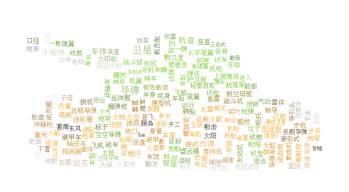

<Figure size 432x288 with 0 Axes>

In [180]:
#展示词云图
plt.imshow(myword.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()
wc.to_file('IG.png')

### lda

In [76]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(corpus)

In [77]:
n_topics=9

In [78]:
from sklearn.decomposition import LatentDirichletAllocation

#### 无标签

In [173]:
lda = LatentDirichletAllocation(n_components =n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, random_state=0)

In [175]:
n_top_words=20

In [182]:
topic_idx

8

In [239]:
#print trained topic model
tf_feature_names = tf_vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(id_to_cat[topic_idx])
    print("Topic #%d:" % topic_idx)
    print(" ".join([tf_feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))

飞行器
Topic #0:
导弹 设计 采用 研制 位于 装备 系统 雷达 年代 直升机 美国 苏联 公司 潜艇 作战 中国 海军 目标 服役 能力
舰船舰艇
Topic #1:
发动机 飞机 战斗机 机身 公司 起落架 轰炸机 生产 尾翼 机型 机翼 原型机 单翼 螺旋桨 掠式 涡轮 空军 首飞 两台 安装
枪械与单兵
Topic #2:
毫米 坦克 装甲 车体 炮塔 装备 火炮 生产 机枪 采用 公司 安装 研制 战车 装置 步兵 驾驶员 陆军 装有 位于
坦克装甲车辆
Topic #3:
迷彩 迷彩服 伪装 左图 林地 江湖 配发 所示 导弹艇 07 87 数码 舰炮 巡逻艇 推出 烈火 中国人民解放军 图案 颜色 部队
火炮
Topic #4:
海军 建造 上层建筑 日本 甲板 美国 航空母舰 服役 驱逐舰 护卫舰 舰队 战列舰 烟囱 下水 造船厂 舰桥 巡洋舰 航母 改装 12
爆炸物
Topic #5:
伪装 云雀 ba sass aip mg pc mh 狙击手 森林 点击 vii 314 斯帕德 哥特 ck 法国 25t 查看 覆盖
导弹武器
Topic #6:
卫星 轨道 系统 发射 提供 飞船 设备 地球 一个 无人机 运行 空间 通信 飞行器 设计 10 数据 探测器 飞行 观测
太空装备
Topic #7:
手枪 步枪 枪管 采用 弹匣 毫米 该枪 枪机 射击 设计 握把 扳机 机匣 保险 冲锋枪 生产 套筒 枪弹 枪托 公司


KeyError: 8

#### 加标签

In [79]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


In [80]:
lda = LatentDirichletAllocation(n_components =n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf,label_id)
n_top_words=20

In [191]:
help(lda)

Help on LatentDirichletAllocation in module sklearn.decomposition._lda object:

class LatentDirichletAllocation(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  LatentDirichletAllocation(n_components=10, *, doc_topic_prior=None, topic_word_prior=None, learning_method='batch', learning_decay=0.7, learning_offset=10.0, max_iter=10, batch_size=128, evaluate_every=-1, total_samples=1000000.0, perp_tol=0.1, mean_change_tol=0.001, max_doc_update_iter=100, n_jobs=None, verbose=0, random_state=None)
 |  
 |  Latent Dirichlet Allocation with online variational Bayes algorithm
 |  
 |  .. versionadded:: 0.17
 |  
 |  Read more in the :ref:`User Guide <LatentDirichletAllocation>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, optional (default=10)
 |      Number of topics.
 |  
 |      .. versionchanged:: 0.19
 |          ``n_topics `` was renamed to ``n_components``
 |  
 |  doc_topic_prior : float, optional (default=None)
 |      Prior of document topic distribution `

In [81]:
#print trained topic model
tf_feature_names = tf_vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([tf_feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic #0:
导弹 设计 采用 研制 位于 装备 系统 雷达 年代 直升机 美国 苏联 公司 潜艇 作战 中国 海军 目标 服役 能力
Topic #1:
发动机 飞机 战斗机 机身 公司 起落架 轰炸机 生产 尾翼 机型 机翼 原型机 单翼 螺旋桨 掠式 涡轮 空军 首飞 两台 安装
Topic #2:
毫米 坦克 装甲 车体 炮塔 装备 火炮 生产 机枪 采用 公司 安装 研制 战车 装置 步兵 驾驶员 陆军 装有 位于
Topic #3:
迷彩 迷彩服 伪装 左图 林地 江湖 配发 所示 导弹艇 07 87 数码 舰炮 巡逻艇 推出 烈火 中国人民解放军 图案 颜色 部队
Topic #4:
海军 建造 上层建筑 日本 甲板 美国 航空母舰 服役 驱逐舰 护卫舰 舰队 战列舰 烟囱 下水 造船厂 舰桥 巡洋舰 航母 改装 12
Topic #5:
伪装 云雀 ba sass aip mg pc mh 狙击手 森林 点击 vii 314 斯帕德 哥特 ck 法国 25t 查看 覆盖
Topic #6:
卫星 轨道 系统 发射 提供 飞船 设备 地球 一个 无人机 运行 空间 通信 飞行器 设计 10 数据 探测器 飞行 观测
Topic #7:
手枪 步枪 枪管 采用 弹匣 毫米 该枪 枪机 射击 设计 握把 扳机 机匣 保险 冲锋枪 生产 套筒 枪弹 枪托 公司
Topic #8:
发射 火箭 手榴弹 运载火箭 卫星 引信 中国 一个 研制 弹体 波音 11 轨道 设计 一号 用于 10 月球 成功 质量


In [184]:
labels

['飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '枪械与单兵',
 '坦克装甲车辆',
 '火炮',
 '导弹武器',
 '太空装备',
 '爆炸物',
 '爆炸物',
 '爆炸物',
 '太空装备',
 '太空装备',
 '太空装备',
 '太空装备',
 '太空装备',
 '导弹武器',
 '火炮',
 '火炮',
 '火炮',
 '火炮',
 '火炮',
 '火炮',
 '火炮',
 '火炮',
 '火炮',
 '火炮',
 '火炮',
 '坦克装甲车辆',
 '坦克装甲车辆',
 '坦克装甲车辆',
 '坦克装甲车辆',
 '坦克装甲车辆',
 '坦克装甲车辆',
 '枪械与单兵',
 '枪械与单兵',
 '枪械与单兵',
 '枪械与单兵',
 '枪械与单兵',
 '舰船舰艇',
 '舰船舰艇',
 '舰船舰艇',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',
 '飞行器',


### nmf

#### 无标签

In [193]:
from sklearn.decomposition import NMF

In [195]:
n_components=9

In [193]:
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf_matrix)

print("\nTopics in NMF model (Frobenius norm):")


Topics in NMF model (Frobenius norm):


In [194]:
tfidf_feature_names = vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topic #0: 飞机 战斗机 海军 美国 公司 设计 发动机 生产 轰炸机 服役 开始 日本 航空母舰 进行 使用 直升机 空军 12 任务 机身
Topic #1: 掠式 尾翼 桨叶 水平尾翼 螺旋桨 发动机 垂直 涡轮 两台 直线 单翼 下置 机身 背鳍 起落架 形下 风扇 安装 舷窗 机型
Topic #2: 坦克 车体 炮塔 毫米 装甲 火炮 驾驶员 战车 该车 步兵 两侧 机枪 装置 装备 前部 车长 榴弹炮 后部 车顶 负重
Topic #3: 位于 上层建筑 甲板 顶部 烟囱 舰桥 主桅 护卫舰 发射装置 后方 位置 舰炮 雷达 后缘 装有 海军 高大 桅杆 前方 安装
Topic #4: 手枪 弹匣 套筒 枪管 该枪 保险 扳机 握把 步枪 毫米 枪弹 枪机 射击 左侧 机匣 冲锋枪 采用 标于 使用 枪托
Topic #5: 导弹 发射 防空 制导 目标 雷达 采用 弹体 反坦克 系统 研制 射程 战斗部 弹道导弹 火箭 导引头 装备 该弹 红旗 反舰导弹
Topic #6: 卫星 轨道 发射 运载火箭 地球 火箭 颗卫星 能够 提供 运行 系统 有效载荷 波段 太阳能 数据 进行 一个 服务 任务 空间
Topic #7: 潜艇 常规 鱼雷 动力 攻击 水雷 建造 围壳 核潜艇 中国 反潜 海军 研制 035 设计 指挥塔 水下 039 远征 北约
Topic #8: 炸弹 弹体 手榴弹 该弹 低阻 引信 系列 爆破 子母 减速 飞机 外形 气动 杀伤 mk80 攻击 头部 阻力 高速 制导



#### 加标签

In [196]:
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf_matrix,label_id)

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (Frobenius norm):
Topic #0: 导弹 发射 防空 制导 目标 雷达 采用 弹体 反坦克 系统 研制 射程 战斗部 火箭 弹道导弹 装备 导引头 该弹 武器 红旗
Topic #1: 掠式 尾翼 桨叶 水平尾翼 螺旋桨 发动机 垂直 涡轮 两台 直线 单翼 下置 机身 背鳍 起落架 形下 风扇 安装 舷窗 机型
Topic #2: 坦克 车体 炮塔 毫米 装甲 火炮 战车 驾驶员 该车 步兵 两侧 机枪 装置 装备 榴弹炮 前部 车长 后部 生产 车顶
Topic #3: 位于 上层建筑 甲板 顶部 烟囱 舰桥 主桅 护卫舰 后方 发射装置 位置 舰炮 雷达 后缘 装有 海军 高大 桅杆 前方 安装
Topic #4: 手枪 弹匣 套筒 枪管 该枪 保险 扳机 握把 步枪 毫米 枪弹 枪机 射击 左侧 机匣 采用 冲锋枪 标于 枪托 位于
Topic #5: 飞机 战斗机 海军 美国 公司 发动机 生产 轰炸机 设计 服役 航空母舰 日本 空军 机身 直升机 战列舰 原型机 12 飞行 航空
Topic #6: 卫星 轨道 发射 运载火箭 地球 火箭 颗卫星 提供 运行 系统 有效载荷 波段 太阳能 数据 一个 服务 空间 通信 太阳 英尺
Topic #7: 潜艇 常规 鱼雷 动力 攻击 水雷 建造 围壳 核潜艇 中国 海军 反潜 研制 设计 035 水下 指挥塔 039 远征 服役
Topic #8: 炸弹 弹体 低阻 手榴弹 该弹 引信 系列 爆破 子母 减速 飞机 外形 杀伤 气动 mk80 攻击 阻力 头部 高速 制导



In [197]:
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5)
nmf_matrix = nmf.fit_transform(tfidf_matrix,label_id)

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (Frobenius norm):
Topic #0: 导弹 发射 防空 制导 目标 雷达 采用 弹体 反坦克 系统 研制 射程 战斗部 火箭 弹道导弹 装备 导引头 该弹 武器 红旗
Topic #1: 掠式 尾翼 桨叶 水平尾翼 螺旋桨 发动机 垂直 涡轮 两台 直线 单翼 下置 机身 背鳍 起落架 形下 风扇 安装 舷窗 机型
Topic #2: 坦克 车体 炮塔 毫米 装甲 火炮 战车 驾驶员 该车 步兵 两侧 机枪 装置 装备 榴弹炮 前部 车长 后部 生产 车顶
Topic #3: 位于 上层建筑 甲板 顶部 烟囱 舰桥 主桅 护卫舰 后方 发射装置 位置 舰炮 雷达 后缘 装有 海军 高大 桅杆 前方 安装
Topic #4: 手枪 弹匣 套筒 枪管 该枪 保险 扳机 握把 步枪 毫米 枪弹 枪机 射击 左侧 机匣 采用 冲锋枪 标于 枪托 位于
Topic #5: 飞机 战斗机 海军 美国 公司 发动机 生产 轰炸机 设计 服役 航空母舰 日本 空军 机身 直升机 战列舰 原型机 12 飞行 航空
Topic #6: 卫星 轨道 发射 运载火箭 地球 火箭 颗卫星 提供 运行 系统 有效载荷 波段 太阳能 数据 一个 服务 空间 通信 太阳 英尺
Topic #7: 潜艇 常规 鱼雷 动力 攻击 水雷 建造 围壳 核潜艇 中国 海军 反潜 研制 设计 035 水下 指挥塔 039 远征 服役
Topic #8: 炸弹 弹体 低阻 手榴弹 该弹 引信 系列 爆破 子母 减速 飞机 外形 杀伤 气动 mk80 攻击 阻力 头部 高速 制导



# preprocess

In [34]:
all_data = []
for content in texts:
    all_data.extend(content)

In [35]:
counter = Counter(all_data)

In [36]:
counter.most_common(10)

[('，', 68702),
 ('的', 48210),
 ('。', 42395),
 ('1', 36958),
 ('0', 28022),
 ('2', 21620),
 ('机', 21558),
 ('9', 21375),
 ('年', 16603),
 ('-', 15646)]

In [37]:
vocab_size = 5000

In [38]:
count_pairs = counter.most_common(vocab_size - 1)
words, _ = list(zip(*count_pairs))
# 添加一个 <PAD> 来将所有文本pad为同一长度
words = ['<PAD>'] + list(words)

In [39]:
word_to_id = dict(zip(words, range(len(words))))

In [40]:
categories = count.index

In [41]:
cat_to_id = dict(zip(categories, range(len(categories))))

In [42]:
cat_to_id

{'飞行器': 0,
 '舰船舰艇': 1,
 '枪械与单兵': 2,
 '坦克装甲车辆': 3,
 '火炮': 4,
 '爆炸物': 5,
 '导弹武器': 6,
 '太空装备': 7}

In [43]:
from tensorflow import keras as kr

In [44]:
def process_file(texts,labels, word_to_id, cat_to_id, max_length=600):
    """将文件转换为id表示"""
    contents, labels = texts, labels

    data_id, label_id = [], []
    for i in range(len(contents)):
        data_id.append([word_to_id[x] for x in contents[i] if x in word_to_id])
        label_id.append(cat_to_id[labels[i]])

    # 使用keras提供的pad_sequences来将文本pad为固定长度
    x_pad = kr.preprocessing.sequence.pad_sequences(data_id, max_length)
    y_pad = kr.utils.to_categorical(label_id, num_classes=len(cat_to_id))  # 将标签转换为one-hot表示

    return x_pad, y_pad


In [45]:
seq_length=700
x_data, y_data = process_file(texts, labels, word_to_id, cat_to_id, seq_length)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test  = train_test_split(x_data, y_data, test_size=0.1, random_state=6, shuffle=True)

In [241]:
import pandas as pd 
import numpy as np 
from scipy import stats
#创建上述表
observed_pd = pd.DataFrame(['1点']*23+['2点']*20+['3点']*18+['4点']*19+['5点']*24+['6点']*16)
expected_pd = pd.DataFrame(['1点']*20+['2点']*20+['3点']*20+['4点']*20+['5点']*20+['6点']*20)
observed_table = pd.crosstab(index=observed_pd[0],columns='count')
expected_table = pd.crosstab(index=expected_pd[0],columns='count')
print(observed_table)
print('——————')
print(expected_table)
#通过公式算出卡方值
observed = observed_table 
expected = expected_table 
chi_squared_stat = ((observed-expected)**2/expected).sum()
print('chi_squared_stat')
print(chi_squared_stat)

col_0  count
0           
1点        23
2点        20
3点        18
4点        19
5点        24
6点        16
——————
col_0  count
0           
1点        20
2点        20
3点        20
4点        20
5点        20
6点        20
chi_squared_stat
col_0
count    2.3
dtype: float64


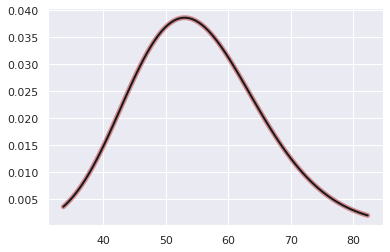

In [244]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

df = 55
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [245]:
df

55